# Telecom : Exam 2021

## Table of content <br>
* [Import](#Import)<br>
* [Utilities](#Utilities)<br>
* [Read](#Read)<br>
* [Data mining and cleaning](#DMC)<br>
    * [Overview](#Overview)<br>
    * [Data Cleaning](#DataCleaning)<br>
    * [Data Analyse](#DataAnalyse)<br>
    * [Data Visualisation](#Graphs)<br>
* [Data Modeling](#DataModeling)<br>
    * [Preprocessing](#Prepro)<br>
    * [Encodage](#Encodage)<br>
    * [Feature Selection](#FeatSelec)<br>
* [Testing and modeling](#TestsModels)
    * [KNN](#KNN)<br>
    * [Decision Tree](#DT)<br>
    * [Random Forest](#RF)<br>
* [Improvements](#Improvements)<br>
    * [Random Forest parameters improvement](#RFPI)<br>
    * [Decision Tree hyperparameters improvement](#DTHI)<br>
    * [Random Forest hyperparameters improvement](#RFHI)<br>
* [Best Model Choice](#BMC)




## Import <a id ="Import"></a>

In this part all the stuff we need will be centralised

In [475]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

### Utilities <a id="Utilities"></a>

In [476]:
def data_overview(df):
    print("####### Data overview #######")
    print("dataset")
    print("__________")
    print(df)
    print("head")
    print("_____")
    print()
    print(df.head(10))
    print()
    print("Rows - columns :" , df.shape)
    print("Number of features : ",df.shape[1]-1)
    print()
    print("Liste des colonnes : ")
    print("_____________________")
    print()
    print(df.columns)
    print()
    print("Liste des types : ")
    print("_____________________")
    print()
    print(df.info())
    print()
    print("Valeurs manquantes par colonne: ")
    print("________________________________")
    print()
    print(df.isnull().sum())
    print()
    print()
    print("Nombre total de valeurs manquantes: ")
    print("____________________________________")
    print()
    print(df.isnull().sum().values.sum())
    print()
    print("Nbre de valeurs différent es par colonne : ")
    print("__________________________________________")
    print()
    print(df.nunique())

In [477]:
def categorical_plots(df,categorical):
    import matplotlib.pyplot as plt
    i=0
    for i,cat_v in enumerate(categorical):
        plt.figure(figsize=(10,24))
        plt.subplots(1,1)
        df[cat_v].value_counts().plot(kind="bar", title=cat_v)
        plt.ylabel('Frequency')

In [478]:
def features_plots(df,numerical):
    import matplotlib.pyplot as plt
    for i,cv in enumerate(numerical):
        plt.figure(figsize=(10,24))
        plt.subplot(7,2,i+1)
        plt.hist(df[cv],bins=df[cv].nunique())
        plt.title(cv)
        plt.ylabel('frequency')
        plt.show()
    for i,cv in enumerate(numerical):
        plt.figure(figsize=(10,24))
        plt.subplot(7,2,i+3)
        plt.boxplot(df[cv])
        plt.title(cv)
        plt.ylabel('boxplot')
        plt.show()

In [479]:
def data_preprocessing(X,y,hot_encoder,binarizer,selector):
    X_categorical=X[ :,0:3]
    X_numerical=X[ :,4:19]
    
    X_categorical=hot_encoder.transform(X_categorical)
    X=np.hstack((X_categorical,X_numerical))
    Y=binarizer.transform(y)
    
    X=selector.transform(X)
    return X,Y

In [480]:
def binary_classifier_evaluation(title,x_test, y_test, y_pred, y_pred_proba,clf) : 
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import roc_auc_score
    import matplotlib.pyplot as plt
    print("=======================")
    print(title)
    print("=======================")
    print()
    print()
    
    # confusion_matrix
    print("CONFUSION MATRIX : ")
    print()
    print(confusion_matrix(y_test, y_pred))
    print()
    print()
    
    
    # the accuracy of the model
    print("ACCURACY OF THE MODEL : ")
    print()
    print(clf.score(x_test, y_test))
    print()
    print()
    
    # classification report
    print("CLASSIFICATION REPORT : ")
    print()
    print(classification_report(y_test, y_pred))
    print()
    print()
    
    # score roc
    print("ROC-AUC SCORE : ")
    print()
    print(roc_auc_score(y_test, y_pred)) 
    print()
    print()
    
    # courbe roc
    print("ROC CURVE : ")
    print()
    y_pred_proba_1 = y_pred_proba[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba_1)
    plt.plot(fpr, tpr, color='coral', lw=2)
    print("False positivze rate", fpr)
    print("True negative rate", tpr)
    print("Thresholds", thresholds)
    

## Read <a id="Read"></a>

In this part we load the dataset file into the notebook

In [481]:
df_telecoms = pd.read_csv("churn-bigml-80.csv", delimiter=",")

In [482]:
df_telecoms.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Data mining and cleaning <a id="DMC"></a>

#### Overview <a id="Overview"></a>

In this part we visualise the dataset in details

In [483]:
data_overview(df_telecoms)

####### Data overview #######
dataset
__________
     State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
2661    SC              79        415                 No              No   
2662    AZ             192        415                 No             Yes   
2663    WV              68        415                 No              No   
2664    RI              28        510                 No              No   
2665    TN              74        415                 No             Yes   

      Number vmail messages  Total day

After the data visualisation, we see that 2 columns are declared as object but we want them as boolean

#### Data Cleaning <a id="DataCleaning"></a>

First we create two dataframe, one with the numerical values and one with the ctegorical values

In [484]:
categorical_columns = ["State", "International plan", "Voice mail plan"]
df_numerical = df_telecoms.drop(categorical_columns,axis=1)
df_numerical = df_numerical.drop("Churn",axis=1)
df_categorical = df_telecoms.drop(df_numerical,axis=1)
df_categorical = df_categorical.drop("Churn",axis=1)


Now we have two df, one with numerical values, the other with categorical values

We create here the target list

In [485]:
df_labels = df_telecoms["Churn"]

#### Data Analyse <a id="DataAnalyse"></a>

Here we see the describe content

In [486]:
# df_numerical.describe()
# df_categorical.describe()

### Data visualisation <a id="Graphs"></a>

<Figure size 720x1728 with 0 Axes>

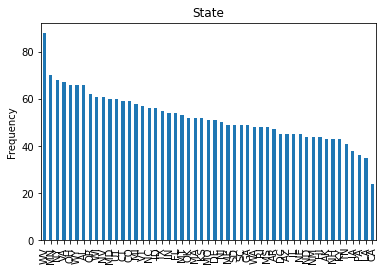

<Figure size 720x1728 with 0 Axes>

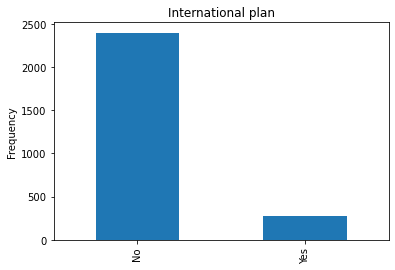

<Figure size 720x1728 with 0 Axes>

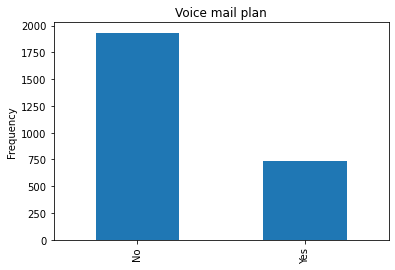

In [487]:
categorical_plots(df_telecoms,df_categorical)

In [488]:
df_numerical.columns

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')

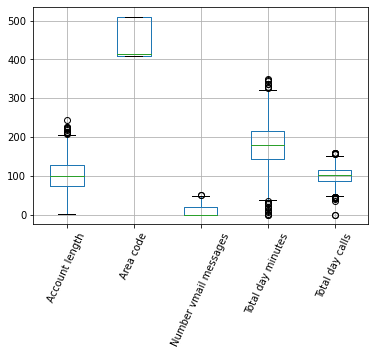

In [489]:
df_numerical_columns = ['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls']
boxplot=df_telecoms.boxplot(column=df_numerical_columns[0:5], rot=65)

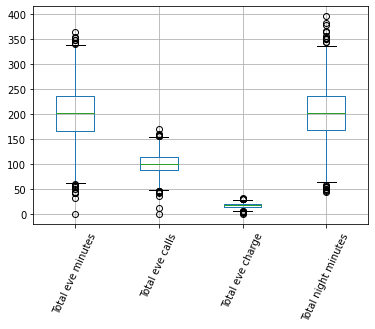

In [490]:
boxplot=df_telecoms.boxplot(column=df_numerical_columns[6:10], rot=65)


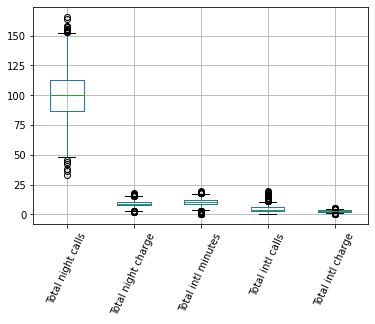

In [491]:
boxplot=df_telecoms.boxplot(column=df_numerical_columns[10:15], rot=65)

## Data modeling <a id="DataModeling"></a>

### Preprocessing <a id="Prepro"></a>

In [492]:
X_categ=df_categorical.to_numpy()
X_numeric=df_numerical.to_numpy()
X=np.hstack((X_categ,X_numeric))
y=df_labels.to_numpy()

In [493]:
X

array([['KS', 'No', 'Yes', ..., 3.0, 2.7, 1.0],
       ['OH', 'No', 'Yes', ..., 3.0, 3.7, 1.0],
       ['NJ', 'No', 'No', ..., 5.0, 3.29, 0.0],
       ...,
       ['WV', 'No', 'No', ..., 4.0, 2.59, 3.0],
       ['RI', 'No', 'No', ..., 6.0, 3.81, 2.0],
       ['TN', 'No', 'Yes', ..., 4.0, 3.7, 0.0]], dtype=object)

In [494]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,stratify=y,test_size=0.3,random_state=2)

### Encodage <a id="Encodage"></a>

In [495]:
# print(X_train.shape)
X_train_categorical=X_train[ :,0:3]
X_train_numerical=X_train[ :, 3:18]
print(X_train_categorical.shape,X_train_numerical.shape)
# X_train_categorical.shape

(1866, 3) (1866, 15)


In [496]:
# Encodage One Hot
from sklearn.preprocessing import OneHotEncoder
hot_encoder=OneHotEncoder(sparse=False)
X_train_categorical=hot_encoder.fit_transform(X_train_categorical)

print(X_train_categorical.shape)
X_train_categorical

(1866, 55)


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [497]:
hot_encoder.categories_

[array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
        'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [498]:
X_train=np.hstack((X_train_categorical,X_train_numerical))
# print(X_train)

In [499]:
# Encodage label binarizer
from sklearn.preprocessing import LabelBinarizer
binarizer=LabelBinarizer()
Y_train=binarizer.fit_transform(y_train)

### Feature selection <a id="FeatSelec"></a>

#### Possibilité d'utiliser le Variance Threshold ou SelectKBest (ici Select K Best)

In [500]:
from sklearn.feature_selection import SelectKBest,chi2

In [501]:
#print(chi2(X_train,Y_train))  - n'accepte pas des valeurs standardisées avec Standard Scaler car <0
selector=SelectKBest(chi2,k=8)
X_train=selector.fit_transform(X_train,Y_train)
# X_train

In [502]:
select=selector.get_support(indices=True)
print(select)
# 51 = 
# 52 = 
# 25 = 
# 54 = 
# 58 = 
# 60 = 
# 61 =
# 64 = 
np.shape(X_train)
X_train

[51 52 54 57 58 60 61 64]


array([[1.0, 0.0, 1.0, ..., 28.56, 163.2, 172.7],
       [1.0, 0.0, 0.0, ..., 44.29, 102.4, 129.7],
       [0.0, 1.0, 1.0, ..., 36.92, 145.5, 280.7],
       ...,
       [1.0, 0.0, 1.0, ..., 30.28, 236.7, 264.0],
       [0.0, 1.0, 0.0, ..., 27.42, 124.4, 262.0],
       [1.0, 0.0, 0.0, ..., 50.68, 201.3, 214.7]], dtype=object)

In [503]:
# Pour tous les modèles (mais inutile pour le DT), il faut standardiser les valeurs nuémriques
X_train_numerical=X_train[:,5:8]
X_train_categorical=X_train[:,0:5]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_numerical=scaler.fit_transform(X_train_numerical)
X_train=np.hstack((X_train_categorical,X_train_numerical))

In [504]:
X_test.shape

(800, 19)

In [505]:
#Appliquer les mêmes transformations à x_test et y_test
X_test,Y_test=data_preprocessing(X_test,y_test,hot_encoder,binarizer,selector)

## Testing and modeling <a id="TestsModels"></a>

### KNN <a id="KNN"></a>

In [506]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN=KNeighborsClassifier()
clf_KNN.fit(X_train,Y_train)
X_test
y_pred_proba=clf_KNN.predict_proba(X_test)
y_pred=clf_KNN.predict(X_test)

D:\Programmation\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


D:\Programmation\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programmation\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programmation\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K nearest neighbors


CONFUSION MATRIX : 

[[684   0]
 [116   0]]


ACCURACY OF THE MODEL : 

0.855


CLASSIFICATION REPORT : 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       684
           1       0.00      0.00      0.00       116

    accuracy                           0.85       800
   macro avg       0.43      0.50      0.46       800
weighted avg       0.73      0.85      0.79       800



ROC-AUC SCORE : 

0.5


ROC CURVE : 

False positivze rate [0.         0.07163743 0.90350877 1.        ]
True negative rate [0.         0.05172414 0.87931034 1.        ]
Thresholds [1.4 0.4 0.2 0. ]


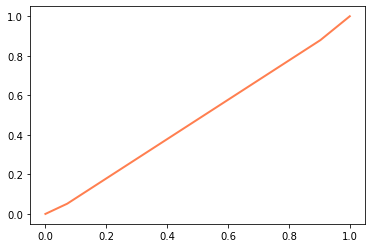

In [507]:
binary_classifier_evaluation("K nearest neighbors",X_test, Y_test, y_pred, y_pred_proba,clf_KNN)

### Decision Tree <a id="DT"></a>

In [508]:
from sklearn.tree import DecisionTreeClassifier
clf_DT= DecisionTreeClassifier(random_state=2)
clf_DT.fit(X_train,Y_train)
y_pred_proba=clf_DT.predict_proba(X_test)
y_pred=clf_DT.predict(X_test)

Decision tree


CONFUSION MATRIX : 

[[ 48 636]
 [ 41  75]]


ACCURACY OF THE MODEL : 

0.15375


CLASSIFICATION REPORT : 

              precision    recall  f1-score   support

           0       0.54      0.07      0.12       684
           1       0.11      0.65      0.18       116

    accuracy                           0.15       800
   macro avg       0.32      0.36      0.15       800
weighted avg       0.48      0.15      0.13       800



ROC-AUC SCORE : 

0.35836358136721114


ROC CURVE : 

False positivze rate [0.         0.92982456 1.        ]
True negative rate [0.         0.64655172 1.        ]
Thresholds [2. 1. 0.]


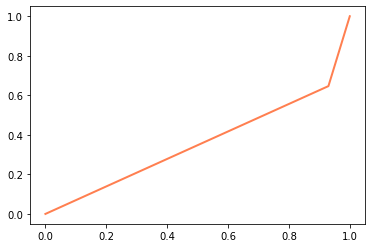

In [509]:
binary_classifier_evaluation("Decision tree",X_test, Y_test, y_pred, y_pred_proba,clf_DT)

### Random Forest <a id="RF"></a>

In [510]:
from sklearn.ensemble import RandomForestClassifier
clf_RF=RandomForestClassifier()
clf_RF.fit(X_train,Y_train)
y_pred_proba=clf_RF.predict_proba(X_test)
y_pred=clf_RF.predict(X_test)

<ipython-input-510-7bde26b7aaac>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RF.fit(X_train,Y_train)


Random Forest


CONFUSION MATRIX : 

[[192 492]
 [ 15 101]]


ACCURACY OF THE MODEL : 

0.36625


CLASSIFICATION REPORT : 

              precision    recall  f1-score   support

           0       0.93      0.28      0.43       684
           1       0.17      0.87      0.28       116

    accuracy                           0.37       800
   macro avg       0.55      0.58      0.36       800
weighted avg       0.82      0.37      0.41       800



ROC-AUC SCORE : 

0.5756957047791893


ROC CURVE : 

False positivze rate [0.         0.00146199 0.00292398 0.02192982 0.40935673 0.71491228
 0.71637427 0.71637427 0.71929825 0.73245614 0.75292398 0.84064327
 0.94444444 0.98976608 0.99122807 1.        ]
True negative rate [0.         0.00862069 0.00862069 0.00862069 0.43103448 0.78448276
 0.86206897 0.87068966 0.87068966 0.94827586 0.94827586 0.95689655
 0.99137931 0.99137931 0.99137931 1.        ]
Thresholds [1.76 0.76 0.7  0.6  0.59 0.58 0.57 0.56 0.53 0.47 0.44 0.43 0.42 0.41
 0.4  0.39]


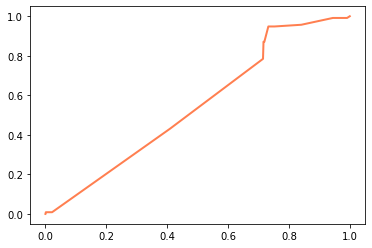

In [511]:
binary_classifier_evaluation("Random Forest",X_test, Y_test, y_pred, y_pred_proba,clf_RF)

## Improvements <a id="Improvements"></a>

### Random Forest parameters improvement <a id="RFPI"></a>

0.5948275862068966


<ipython-input-512-3a410e3ecbfa>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RF.fit(X_train,Y_train)
<ipython-input-512-3a410e3ecbfa>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RF.fit(X_train,Y_train)
<ipython-input-512-3a410e3ecbfa>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RF.fit(X_train,Y_train)


0.5948275862068966
0.9224137931034483


<ipython-input-512-3a410e3ecbfa>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RF.fit(X_train,Y_train)


0.8706896551724138


<ipython-input-512-3a410e3ecbfa>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RF.fit(X_train,Y_train)


0.8706896551724138


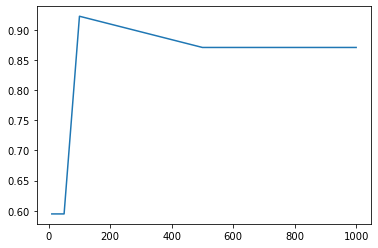

In [512]:
from sklearn.metrics import recall_score
recalls = []
nb_trees = [10,50,100,500,1000]
for i in nb_trees:
    clf_RF = RandomForestClassifier(n_estimators=i, random_state=2)
    clf_RF.fit(X_train,Y_train)
    
    # Make predict on the test set features
    y_pred = clf_RF.predict(X_test)
    recalls.append(recall_score(Y_test, y_pred))
    print(recall_score(Y_test,y_pred))
    
import matplotlib.pyplot as plt
plt.plot(nb_trees, recalls)

### Decision Tree hyperparameters improvement <a id="DTHI"></a>

In [513]:
# Explications : https://www.youtube.com/watch?v=w_bLGK4Pteo
# Grid Search et cross validation
#Find the best Hyperparameters cross validation
criterions = ['gini', 'entropy']
max_depth = [1,3,5,7,9,11,13,15]

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = clf_DT, scoring="recall" , cv=5, param_grid={'criterion': criterions, 'max_depth': max_depth})

grid.fit(X_train, Y_train)
print("Best parameters", grid.best_params_)

Best parameters {'criterion': 'gini', 'max_depth': 15}


In [514]:
from sklearn.tree import DecisionTreeClassifier
clf_DT= DecisionTreeClassifier(criterion='entropy', max_depth=13,random_state=2)
clf_DT.fit(X_train,Y_train)
y_pred_proba=clf_DT.predict_proba(X_test)
y_pred=clf_DT.predict(X_test)

Decision tree


CONFUSION MATRIX : 

[[ 48 636]
 [ 41  75]]


ACCURACY OF THE MODEL : 

0.15375


CLASSIFICATION REPORT : 

              precision    recall  f1-score   support

           0       0.54      0.07      0.12       684
           1       0.11      0.65      0.18       116

    accuracy                           0.15       800
   macro avg       0.32      0.36      0.15       800
weighted avg       0.48      0.15      0.13       800



ROC-AUC SCORE : 

0.35836358136721114


ROC CURVE : 

False positivze rate [0.         0.92982456 1.        ]
True negative rate [0.         0.64655172 1.        ]
Thresholds [2. 1. 0.]


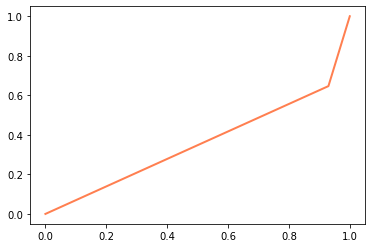

In [515]:
binary_classifier_evaluation("Decision tree",X_test, Y_test, y_pred, y_pred_proba,clf_DT)

### Random Forest hyperparameters improvement <a id="RFHI"></a>

In [516]:
#Find the best Hyperparameters combinaison by cross validation
criterions = ['gini', 'entropy']
#max_depth = [1,3,5,7,9,11,13,15]
nb_estimators=[10,500,700]

#cross validation
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = clf_RF, scoring="recall" , cv=5, param_grid={'n_estimators':nb_estimators,'criterion': criterions})

#train the set with to find the best hyperparameters
grid.fit(X_train, Y_train)
print("Best parameters", grid.best_params_)

D:\Programmation\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programmation\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programmation\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programmation\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector 

Best parameters {'criterion': 'gini', 'n_estimators': 500}


# A finir
## Performance du modèle en fonction de la grandeur du train set
## Model performance 

[ 298  596  895 1193 1492]


<function matplotlib.pyplot.legend(*args, **kwargs)>

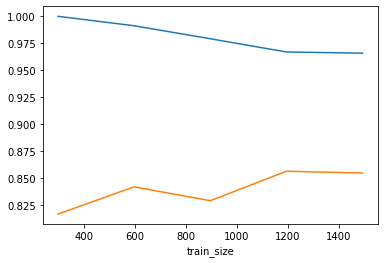

In [581]:
from sklearn.model_selection import learning_curve
# Avec le décision tree
N, train_score,val_score=learning_curve(clf_DT,X_train,Y_train,train_sizes=np.linspace(0.2,1.0,5),cv=5)
print(N)
plt.plot(N,train_score.mean(axis=1),label="train")
plt.plot(N,val_score.mean(axis=1),label="validation")
plt.xlabel("train_size")
plt.legend

D:\Programmation\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programmation\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programmation\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programmation\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector 

<function matplotlib.pyplot.legend(*args, **kwargs)>

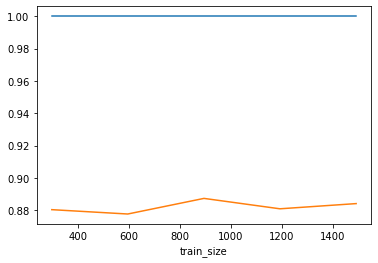

In [527]:
# Avec le random forest
N, train_score,val_score=learning_curve(clf_RF,X_train,Y_train,train_sizes=np.linspace(0.2,1.0,5),cv=5)
# print(N)
plt.plot(N,train_score.mean(axis=1),label="train")
plt.plot(N,val_score.mean(axis=1),label="validation")
plt.xlabel("train_size")
plt.legend

## Régression linéaire

In [556]:
x=df_telecoms.drop(["State", "International plan", "Voice mail plan","Churn"],axis=1)
x=x.to_numpy()
y=df_telecoms["Churn"]
y=y.to_numpy()
y=y.reshape(y.shape[0],1)

In [557]:
x.shape

(2666, 16)

In [558]:
y.shape

(2666, 1)

In [559]:
# d'abord faire ma colonne de 1 pour avoir mon Xtheta
X=np.hstack((x,np.ones((x.shape[0],1))))
print(X)

[[128.   415.    25.   ...   2.7    1.     1.  ]
 [107.   415.    26.   ...   3.7    1.     1.  ]
 [137.   415.     0.   ...   3.29   0.     1.  ]
 ...
 [ 68.   415.     0.   ...   2.59   3.     1.  ]
 [ 28.   510.     0.   ...   3.81   2.     1.  ]
 [ 74.   415.    25.   ...   3.7    0.     1.  ]]


In [563]:
theta = np.random.rand(17,1)
theta

array([[0.24862925],
       [0.49373629],
       [0.16246473],
       [0.38756888],
       [0.70828464],
       [0.2561492 ],
       [0.67657388],
       [0.78203759],
       [0.91670387],
       [0.01474905],
       [0.2050916 ],
       [0.24521434],
       [0.02161532],
       [0.49893989],
       [0.62005987],
       [0.72291052],
       [0.7732616 ]])

# model <a id="model"></a>

In [564]:
def model(X,theta):
    return X.dot(theta)

In [565]:
model(X,theta)

array([[689.20243026],
       [653.83785984],
       [633.20223234],
       ...,
       [557.47343541],
       [708.66668805],
       [700.57105916]])

### Cost Function <a id="cost function"></a>

In [566]:
def cost_function(X,y,theta):
    m=len(y)
    return (1/(2*m))*np.sum((model(X,theta)-y)**2)

In [567]:
cost_function(X,y,theta)

213900.92247017764

# gradient descent

In [568]:
def grad(X,y,theta):
    m=len(y)
    return 1/m*X.T.dot(model(X,theta)-y)

In [569]:
def gradient_descent(X,y,theta, learning_rate,n_iterations):
    for i in range(0,n_iterations):
        theta=theta-learning_rate*(grad(X,y,theta))
    return theta

# Train the model

In [570]:
theta_final = gradient_descent(X,y,theta,learning_rate=0.001, n_iterations=100)
theta_final

array([[1.95601556e+253],
       [8.51188035e+253],
       [1.55598236e+252],
       [3.50458559e+253],
       [1.94409329e+253],
       [5.95789882e+252],
       [3.90810759e+253],
       [1.93835716e+253],
       [3.32194044e+252],
       [3.92342159e+253],
       [1.94057164e+253],
       [1.76555508e+252],
       [1.98116603e+252],
       [8.64433901e+251],
       [5.35010408e+251],
       [3.02725255e+251],
       [1.93591336e+251]])

In [571]:
cost_function(X,y,theta_final)

<ipython-input-566-fb8c836f17fa>:3: RuntimeWarning: overflow encountered in square
  return (1/(2*m))*np.sum((model(X,theta)-y)**2)


inf

In [572]:
y_pred = model(X,theta_final)

In [573]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y,y_pred)

6.734121929564913e+256

In [574]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_pred)

D:\Programmation\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:338: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


inf

In [575]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y,y_pred) # x peut expliquer en partie la variablilité de y 
# et ici on cherche à savoir le % de fiabilité que l'on peut accorder à x sur y

D:\Programmation\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:557: RuntimeWarning: overflow encountered in square
  numerator = np.average((y_true - y_pred - y_diff_avg) ** 2,


-inf

# with sklearn

In [576]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [577]:
model_regression=linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=2)
model_regression.fit(x_train,y_train)
model_regression.coef_
y_predict=model_regression.predict(x_test)

In [578]:
mean_absolute_error(y_test,y_predict)

0.22106823437867187

In [579]:
mean_squared_error(y_test,y_predict)

0.09993028403032916

In [580]:
explained_variance_score(y_test,y_predict)

0.09287611643213078